# Лабораторная работа №3
Цель работы – построение тональной траектории музыкального трека.
1.  Построить траектории трех максимумов по матрице нотного спектра Zt,i (пример на
рисунке 1) на своей музыкальной записи.
2.  По оси OX — время (номера интервалов t ∈ 0 : T ), по оси OY значения максимумов (в Hz).
3. Траектория каждого максимума — своим цветом.

Требуется загрузить аудио с названием `Track4.wav`

In [57]:
#!wget https://disk.yandex.ru/d/fAUyjDWOGa-Cvw/Track4.wav -o music.wav
#path_to_wave = "/content/music_test.wav"
path_to_wave = "/content/Track4.wav"

In [58]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from scipy.fft import fftfreq, ifft
import matplotlib.pyplot as plt
from itertools import zip_longest
import more_itertools as mits
import soundfile as sf

Sample rate: 44100 Hz
Total time: 53.49852607709751s


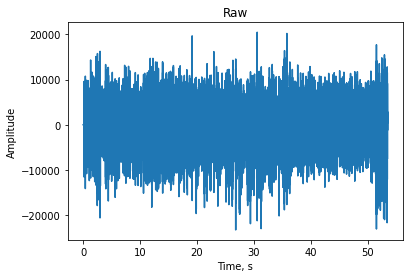

In [130]:
frame_rate, sound_data = wavfile.read(path_to_wave)
time                   = np.arange(0,len(sound_data))/frame_rate

#sound_data = sound_data.T[0]
# Show information about the object
print('Sample rate:',frame_rate,'Hz')
print(f'Total time: {len(sound_data)/frame_rate}s')

plt.plot(time, sound_data)
plt.title("Raw")
plt.xlabel("Time, s")
plt.ylabel("Amplitude")

plt.show()

In [131]:
Audio(sound_data,rate=frame_rate)

In [132]:
N = 14
dimension = 2 ** N # 16384 
spctr = round(frame_rate/dimension)
Fd = frame_rate
Sr = Fd / dimension
m = 60
overlap = 0.25
dimension, Sr
WH = np.hamming(dimension)
TRANSER_NOTE = 1.059475078256682
length_voice = len(sound_data)

# Вычисляем нотную последователость 

In [133]:
notes = [220]
for i in range(1, 60):
  notes.append(notes[i - 1] * TRANSER_NOTE)

len(notes) 

60

# Определяем центр нот

In [134]:
C = []
for note in notes:
  C.append(int(note/Sr + 0.5))
print(C[0])

82


# Интервалы нот

In [135]:
L = []
R = []
for i in range(1, m-1):
  L.append(1/2*(C[i-1] + C[i]))
  R.append(1/2*(C[i] + C[i+1]))

# Вычисление ДПФ

In [136]:
processedData = []
start = 0
finish = dimension

while finish < length_voice:
  buf = []
  for i in range(dimension):
    buf.append(sound_data[start+i])

  processedData.append(buf)
  start+=int(overlap*dimension)
  finish+=int(overlap*dimension)
dimension

16384

In [137]:
for idx, _ in enumerate(processedData):
  processedData[idx] *= WH
  processedData[idx] = fft(processedData[idx])[:dimension//2]
  processedData[idx] = np.abs(processedData[idx])


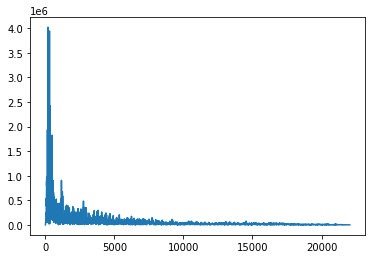

In [138]:
index = 0

f = fftfreq(int(dimension), 1 / frame_rate)[:dimension//2]
plt.plot(f, processedData[index])
plt.show()

In [139]:
Zmtrx = []
for idx, el in enumerate(processedData):
  Zt = []
  for i in range(len(L)):
    left, right = L[i]/Sr, R[i]/Sr
    res = 0
    for j in range(int(left), int(right)):
      res += el[j]
    Zt.append(res/(R[i] - L[i] + 1))
  Zmtrx.append(Zt)
None

In [98]:
Zmax = []

for _ in range(3):
  Zmax.append([0] * len(processedData))

for idx, el_data in enumerate(Zmtrx):
    for index_of_mtrx, el_from_mtrx in enumerate(el_data):
        if el_from_mtrx > Zmax[2][idx]:
            counter = 0
            while counter < len(Zmax) - 1 and el_from_mtrx < Zmax[counter][idx]:
                counter += 1
            k_offset = len(Zmax) - 1
            while counter < k_offset:
                Zmax[k_offset][idx] = Zmax[k_offset - 1][idx]
                k_offset -= 1
            Zmax[k_offset][idx] = el_from_mtrx

572 572
3


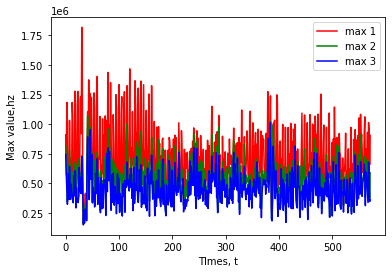

In [141]:
fig, ax = plt.subplots()
plt.xlabel("TImes, t")
plt.ylabel("Max value,hz")

ax.plot(Zmax[0], 'r-', label=f"max 1")
ax.plot(Zmax[1], 'g-', label=f"max 2")
ax.plot(Zmax[2], 'b-', label=f"max 3")

ax.legend()
plt.show()

# Вывод

Выполнение данной лабораторной работы закрепило практические навыки работы с библиотеками языка программирования Python: matplotlib, scipy, numpy. С помощью них обрабатывались звуковые сигналы, выполнялось дискретное преобразование Фурье, чтобы анализировать речевые сигналы, находя максимумы по матрице нотного спектра.
